<a href="https://colab.research.google.com/github/codeRisshi25/Statistical_Machine_Learning_Assignments/blob/main/SML_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Customer ID        Age  401K Savings  Retire
0            0  39.180417   322349.8740       0
1            1  56.101686   768671.5740       1
2            2  57.023043   821505.4718       1
3            3  43.711358   494187.4850       0
4            4  54.728823   691435.7723       1
     Customer ID        Age  401K Savings  Retire
495          495  46.678128   704243.0776       1
496          496  43.545007   483175.9998       0
497          497  46.476724   354919.1987       0
498          498  50.903631   639789.9219       1
499          499  38.590586   491310.0096       0
Customer ID     0
Age             0
401K Savings    0
Retire          0
dtype: int64


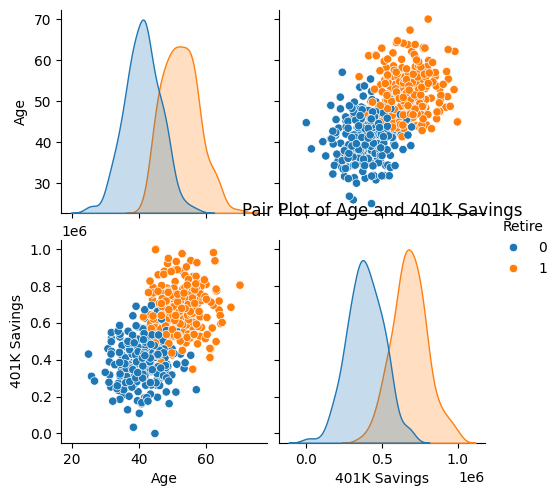

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Bank_Customer_retirement.csv')

print(data.head())
print(data.tail())

print(data.isnull().sum())

data.dropna(inplace=True)

sns.pairplot(data, hue='Retire', vars=['Age', '401K Savings'])
plt.title('Pair Plot of Age and 401K Savings')
plt.show()


X = data[['Age', '401K Savings']]
y = data['Retire']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

C: 1.0, gamma: scale


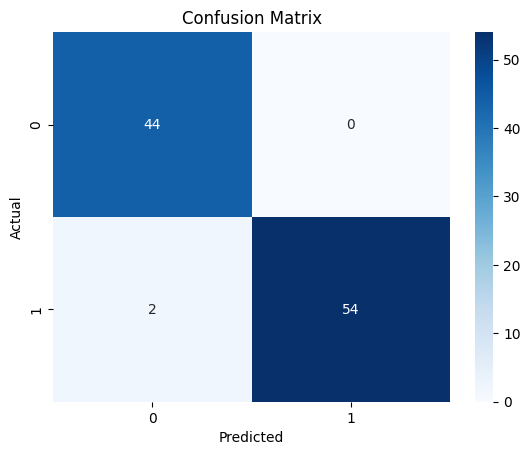

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.96      0.98        56

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

print(f'C: {svm_model.C}, gamma: {svm_model.gamma}')

y_pred = svm_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)